<a href="https://colab.research.google.com/github/mahima8178/100-pandas-puzzles/blob/master/new_train_bilstm_4-128_ALL_SETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

In [3]:
%cd /content/drive/My Drive/Kaggle

/content/drive/My Drive/Kaggle


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
!pip install helper

In [6]:
!pip install helper-funcs

In [7]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation , LSTM , Dropout , AveragePooling3D
import pandas as pd

import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('Epileptic Seizure Recognition.csv')

In [9]:
!pip install pyEMD

In [10]:
import numpy as np
from scipy import signal
from pyemd import emd
from scipy.stats import skew,kurtosis
from scipy.io import loadmat
from joblib import Parallel, delayed
import time


In [11]:
!pip install scikit-plot

# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

In [12]:
!wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/Z.zip  # Set A
!wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/O.zip  # Set B
!wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/N.zip  # Set C
!wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/F.zip  # Set D
!wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/S.zip  # Set E
  
!unzip Z.zip -d 'Set A'
!unzip O.zip -d 'Set B'
!unzip N.zip -d 'Set C'
!unzip F.zip -d 'Set D'
!unzip S.zip -d 'Set E'

--2021-05-12 18:44:14--  http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/Z.zip
Resolving epileptologie-bonn.de (epileptologie-bonn.de)... 83.169.36.208
Connecting to epileptologie-bonn.de (epileptologie-bonn.de)|83.169.36.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 578047 (564K) [application/zip]
Saving to: ‘Z.zip.10’

Z.zip.10            100%[===================>] 564.50K  1.22MB/s    in 0.5s    

2021-05-12 18:44:15 (1.22 MB/s) - ‘Z.zip.10’ saved [578047/578047]

--2021-05-12 18:44:15--  http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/O.zip
Resolving epileptologie-bonn.de (epileptologie-bonn.de)... 83.169.36.208
Connecting to epileptologie-bonn.de (epileptologie-bonn.de)|83.169.36.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625970 (611K) [application/zip]
Saving to: ‘O.zip.10’

O.zip.10            100%[===================>] 611.30K  1.10MB/s    in 0.5s    

2021-05-12 18:44:16 (1.10 MB/s) - ‘O.zip

In [13]:
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

DATA_DIR_A = './Set A/'
DATA_DIR_B = './Set B/'
DATA_DIR_C = './Set C/'
DATA_DIR_D = './Set D/'
DATA_DIR_E = './Set E/'

LABEL_C1 = 0
LABEL_C2 = 1

def load_data():
    data = []
    nbFiles = 0
    for fname in tqdm(os.listdir(DATA_DIR_A)):
        img = np.loadtxt(DATA_DIR_A + fname)
        data.append([np.array(img), np.array(LABEL_C1)])
        nbFiles+=1
    for fname in tqdm(os.listdir(DATA_DIR_B)):
        img = np.loadtxt(DATA_DIR_B + fname)
        data.append([np.array(img), np.array(LABEL_C1)])
        nbFiles+=1
    for fname in tqdm(os.listdir(DATA_DIR_C)):
        img = np.loadtxt(DATA_DIR_C + fname)
        data.append([np.array(img), np.array(LABEL_C1)])
        nbFiles+=1
    for fname in tqdm(os.listdir(DATA_DIR_D)):
        img = np.loadtxt(DATA_DIR_D + fname)
        data.append([np.array(img), np.array(LABEL_C1)])
        nbFiles+=1    
    for fname in tqdm(os.listdir(DATA_DIR_E)):
        img = np.loadtxt(DATA_DIR_E + fname)
        data.append([np.array(img), np.array(LABEL_C2)])
        nbFiles+=1
        
    return data


data = load_data()
print('\n')
print('Total Files: {}'.format(len(data)))
print('Shape of data: {}'.format(np.shape(data)))

100%|██████████| 100/100 [00:01<00:00, 82.34it/s]



Total Files: 500
Shape of data: (500, 2)



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


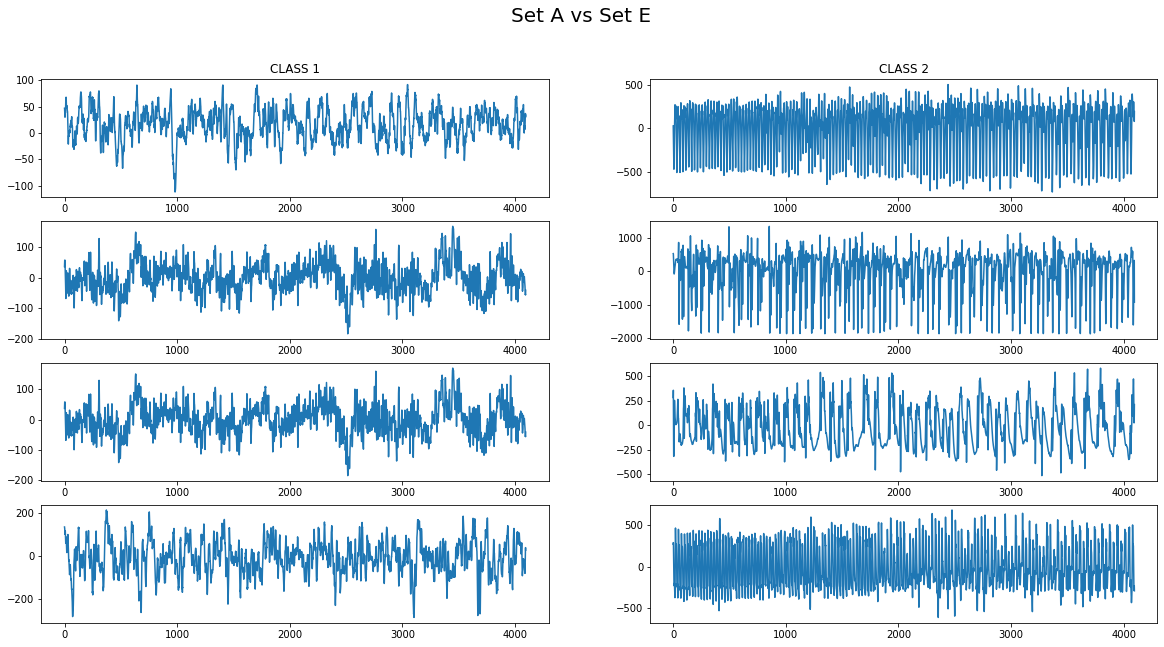

In [14]:
# data visualization

import random
mpl.rcParams['figure.figsize'] = (20,10)

fig = plt.figure()

samples_c1 = np.empty((0, 4097), int)
while len(samples_c1) < 4:
    curID = random.randint(0, len(data)) # random id between 0-200
    if data[curID][1] == LABEL_C1:
        samples_c1 = np.vstack((samples_c1, data[curID][0]))
        
samples_c2 = np.empty((0, 4097), int)
while len(samples_c2) < 4:
    curID = random.randint(0, len(data))
    if data[curID][1] == LABEL_C2:
        samples_c2 = np.vstack((samples_c2, data[curID][0]))
        
for i in range(0, 4):
    plt.subplot(421 + i * 2)
    plt.plot(samples_c1[i])
    plt.subplot(421 + i * 2 + 1)
    plt.plot(samples_c2[i])

ax = plt.subplot(421)
ax.set_title("CLASS 1")
ax = plt.subplot(422)
ax.set_title("CLASS 2")

fig.suptitle("Set A vs Set E", fontsize=20)
plt.show()

In [15]:

# data preparation
from sklearn.utils import shuffle
data = shuffle(data)
nb_train = round(len(data) * 0.8)
data_train = data[0:nb_train]
data_test = data[nb_train:]

print(data_train[:2])

[[array([-71., -73., -74., ..., -99., -94., -57.]), array(0)], [array([ 162.,  164.,  164., ...,  -32.,   19., -342.]), array(0)]]


In [16]:
X_train = np.array([d[0] for d in data_train])
Y_train = np.array([d[1] for d in data_train])

X_test = np.array([d[0] for d in data_test])
Y_test = np.array([d[1] for d in data_test])

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print('X_test',X_test)
print('\nY_test',Y_test)


(400, 4097)
(100, 4097)
(400,)
(100,)
X_test [[  26.   16.   13. ...  114.   99. -130.]
 [  20.   27.   -5. ... -111.  -71.   -9.]
 [  36.   27.   24. ...   66.   59.    6.]
 ...
 [ -54.  -62.  -65. ...   -2.  -12.  -71.]
 [  30.   19.   -3. ...  -11.  -13.   -6.]
 [  -4.    4.   10. ...  -40.  -45.  -58.]]

Y_test [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
X_train = X_train.reshape(X_train.shape[0], 4097, 1)
Y_train = Y_train.reshape(Y_train.shape[0], 1)

X_test = X_test.reshape(X_test.shape[0], 4097, 1)
Y_test = Y_test.reshape(Y_test.shape[0], 1)


print('Training data :',X_train.shape)
print('Training label:',Y_train.shape)
print('Testing data  :',X_test.shape)
print('Testing label :',Y_test.shape)

print('\nOriginal training label:\n',Y_train[0:3])


# Encode labels to hot vectors (ex : 2 -> 0=[1,0] and 1=[0,1])
from keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes = 2)
Y_test = to_categorical(Y_test, num_classes = 2)


print('\nOne-hot encoded label:\n',Y_train[0:3])

Training data : (400, 4097, 1)
Training label: (400, 1)
Testing data  : (100, 4097, 1)
Testing label : (100, 1)

Original training label:
 [[0]
 [0]
 [0]]

One-hot encoded label:
 [[1. 0.]
 [1. 0.]
 [1. 0.]]


In [18]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.callbacks import ReduceLROnPlateau
from keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization,Flatten,GlobalAveragePooling1D,GlobalMaxPooling1D

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,BatchNormalization, LSTM
from keras.layers import Embedding
from keras.callbacks import EarlyStopping,ModelCheckpoint

batch_size =16
nb_epoch = 25
hidden_size = 128
use_dropout=True

earlyStopping = EarlyStopping(monitor='val_loss', patience=30, verbose=0, mode='min')
chckpoint = ModelCheckpoint('./drive/My Drive/data/cuDNNlstm_model.h5', save_best_only=True, monitor='val_loss', mode='min')


model = Sequential()
model.add(Bidirectional(LSTM(128,input_shape=(4097, 1), return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.25))
model.add(Dense(56))
model.add(Activation('relu'))
model.add(Dropout(0.35))
model.add(Dense(2))
model.add(Activation('softmax'))

#opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mae', 'acc'])


history = model.fit(X_train, Y_train, verbose=1, validation_data=(X_test, Y_test),shuffle=True, batch_size=batch_size, epochs=nb_epoch, callbacks=[earlyStopping,chckpoint])

Epoch 1/25
25/25 [==============================] - 24s 678ms/step - loss: 0.3968 - mae: 0.2582 - acc: 0.8157 - val_loss: 0.0903 - val_mae: 0.0660 - val_acc: 0.9700
Epoch 2/25
25/25 [==============================] - 15s 590ms/step - loss: 0.1407 - mae: 0.0819 - acc: 0.9527 - val_loss: 0.1352 - val_mae: 0.0787 - val_acc: 0.9500
Epoch 3/25
25/25 [==============================] - 15s 594ms/step - loss: 0.1373 - mae: 0.0920 - acc: 0.9404 - val_loss: 0.0807 - val_mae: 0.0460 - val_acc: 0.9600
Epoch 4/25
25/25 [==============================] - 15s 591ms/step - loss: 0.1298 - mae: 0.0680 - acc: 0.9573 - val_loss: 0.0652 - val_mae: 0.0341 - val_acc: 0.9800
Epoch 5/25
25/25 [==============================] - 15s 585ms/step - loss: 0.1060 - mae: 0.0542 - acc: 0.9574 - val_loss: 0.1585 - val_mae: 0.1012 - val_acc: 0.9500
Epoch 6/25
25/25 [==============================] - 15s 584ms/step - loss: 0.0887 - mae: 0.0664 - acc: 0.9615 - val_loss: 0.1633 - val_mae: 0.0630 - val_acc: 0.9500
Epoch 7/25

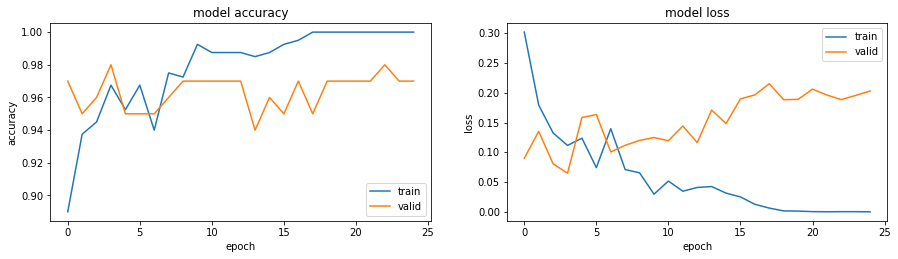

dict_keys(['loss', 'mae', 'acc', 'val_loss', 'val_mae', 'val_acc'])


In [20]:
import matplotlib.pyplot as plt

plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid'],loc='lower right') 
    
plt.subplot(222)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid'], loc='upper right') 

plt.show()

print(history.history.keys())

In [21]:
# Look at confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
!pip install scikit-plot

In [23]:
pip install scikit-plot

In [24]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)



****************** model loaded *******************
13/13 [==============================] - 2s 168ms/step - loss: 0.2029 - mae: 0.0292 - acc: 0.9700

[info] loss=0.203, accuracy: 97.000%


              precision    recall  f1-score   support

      normal       0.99      0.98      0.98        88
   epileptic       0.85      0.92      0.88        12

    accuracy                           0.97       100
   macro avg       0.92      0.95      0.93       100
weighted avg       0.97      0.97      0.97       100



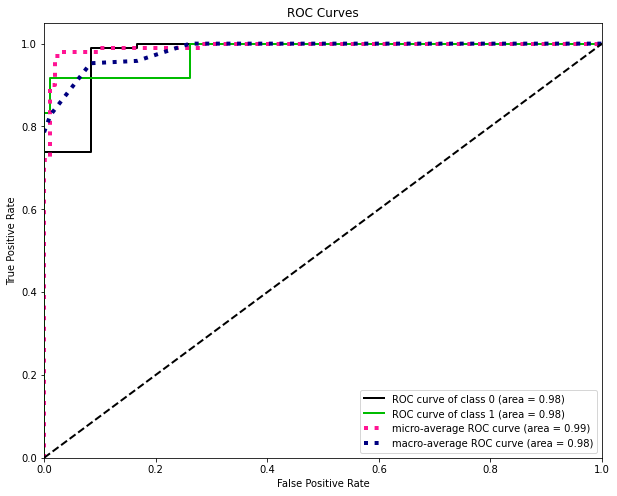

In [25]:
import itertools
import sklearn
from sklearn.metrics import confusion_matrix
import scikitplot
from keras.models import load_model, Model

# Load trained network
#model = load_model('./drive/My Drive/data/cuDNNlstm_model.h5')    # ./drive/My Drive/data/cuDNNlstm_model.h5

print('\n****************** model loaded *******************')

batch_size = 8
# Evaluate the trained model
score = model.evaluate(X_test, Y_test, batch_size=batch_size)
print("\n[info] loss={:.3f}, accuracy: {:.3f}%\n".format(score[0],score[2] * 100))

# Make prediction
y_pred = model.predict(X_test) 
map_characters = {0: 'normal', 1: 'epileptic'}
print('\n', sklearn.metrics.classification_report(np.where(Y_test > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')

Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(Y_test,axis = 1) 

# plot confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
#lot_confusion_matrix(confusion_mtx, classes = list(map_characters.values()))


# Plot roc curve:
scikitplot.metrics.plot_roc(np.argmax(Y_test, axis=1), y_pred, figsize=(10,8))
plt.show()

In [26]:
confusion_mtx 

array([[86,  2],
       [ 1, 11]])

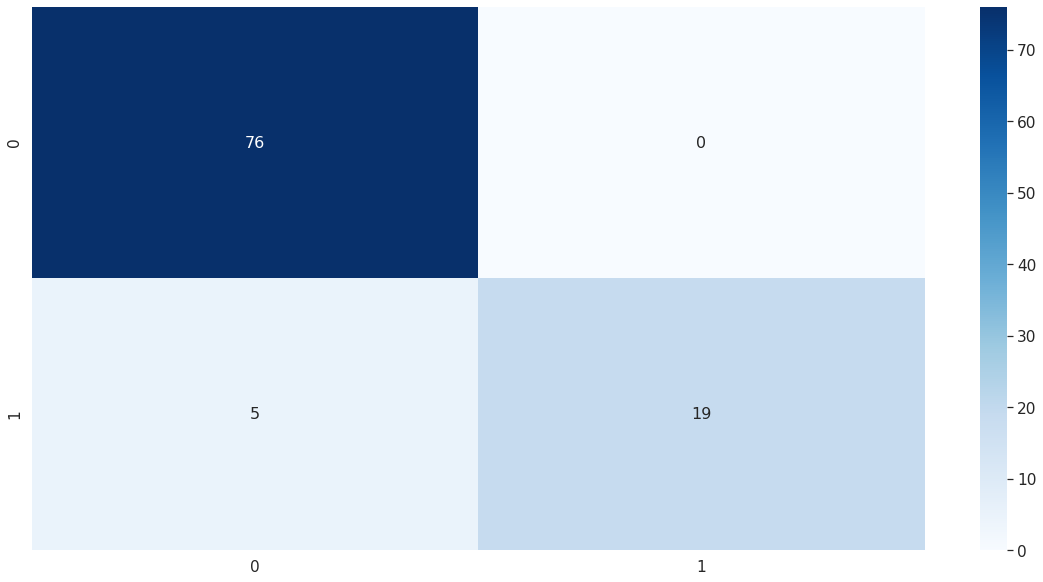

In [27]:
array=[[76,  0],
       [ 5, 19]]

df_cm = pd.DataFrame(array, range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, cmap="Blues",annot_kws={"size": 16}) # font size

plt.show()

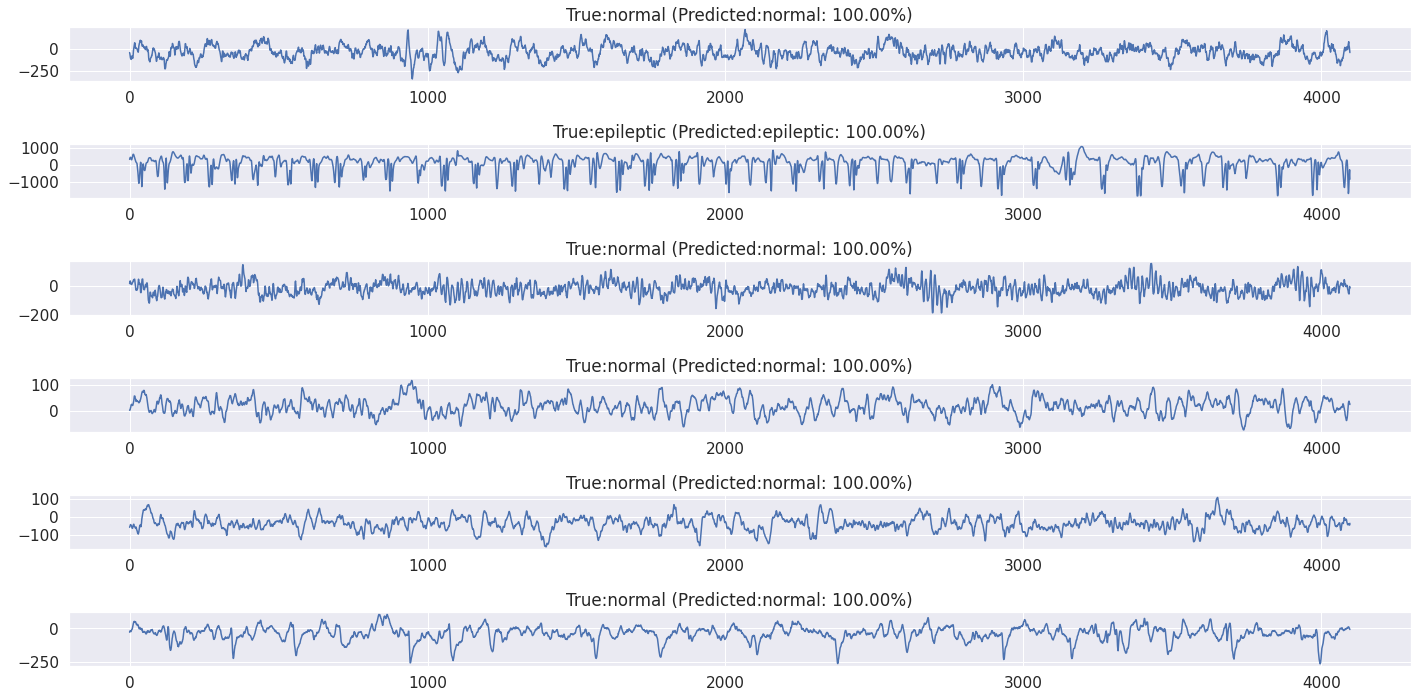

In [28]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import cv2
from google.colab.patches import cv2_imshow
import random

idx = random.sample(range(0,40), 6) # regenerate random index

for i in range(6):
    (normal, epileptic) = model.predict(X_test)[idx[i]]
    label = "normal" if normal > epileptic else "epileptic"
    proba = epileptic if epileptic > normal else normal
    label = "{}: {:.2f}%".format(label, proba * 100)
    true_label = 'normal' if (Y_test[idx[i]] == 1)[0] else 'epileptic'
   
    plt.subplot(611+i)
    plt.plot(X_test[idx[i]])
    plt.title('True:{} (Predicted:{})'.format(true_label,label))
    plt.axis('on')
    plt.tight_layout()

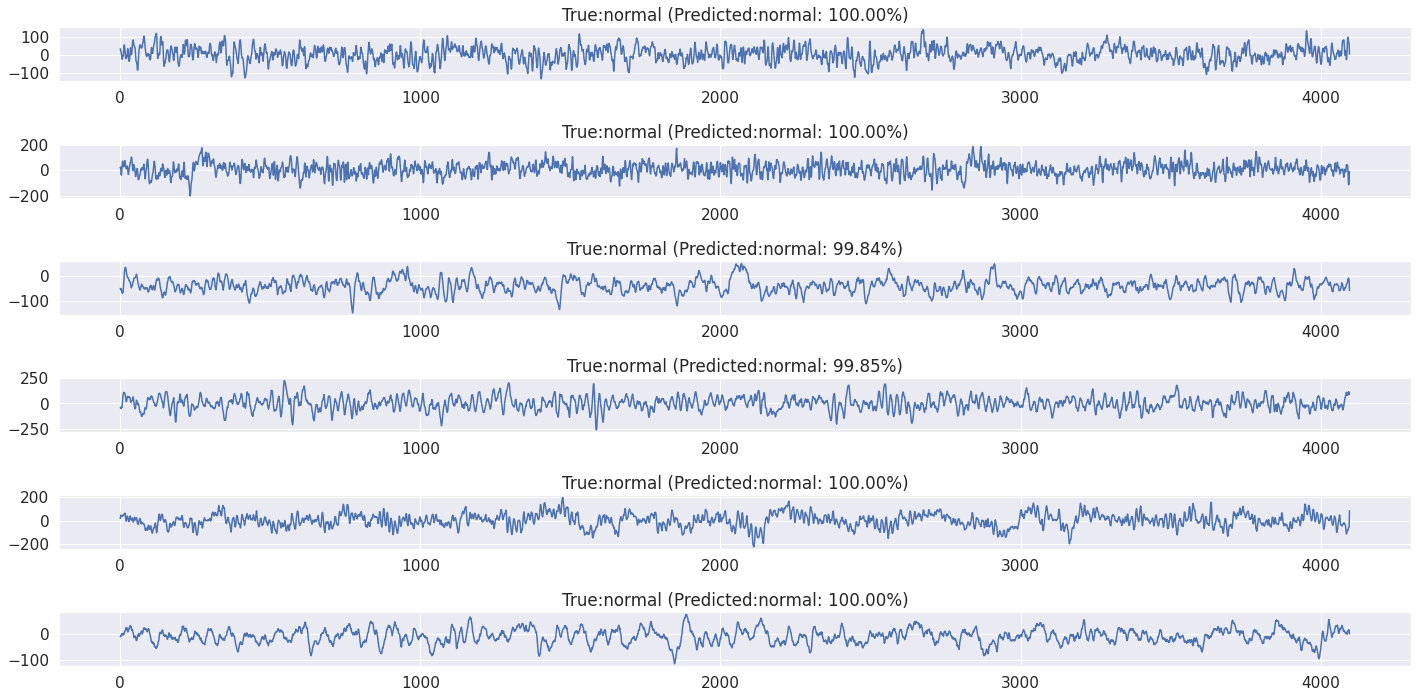

In [30]:
idx = random.sample(range(0,80), 6) # regenerate random index

for i in range(6):
    (normal, epileptic) = model.predict(X_test)[idx[i]]
    label = "normal" if normal > epileptic else "epileptic"
    proba = epileptic if epileptic > normal else normal
    label = "{}: {:.2f}%".format(label, proba * 100)
    true_label = 'normal' if (Y_test[idx[i]] == 1)[0] else 'epileptic'
   
    plt.subplot(611+i)
    plt.plot(X_test[idx[i]])
    plt.title('True:{} (Predicted:{})'.format(true_label,label))
    plt.axis('on')
    plt.tight_layout()

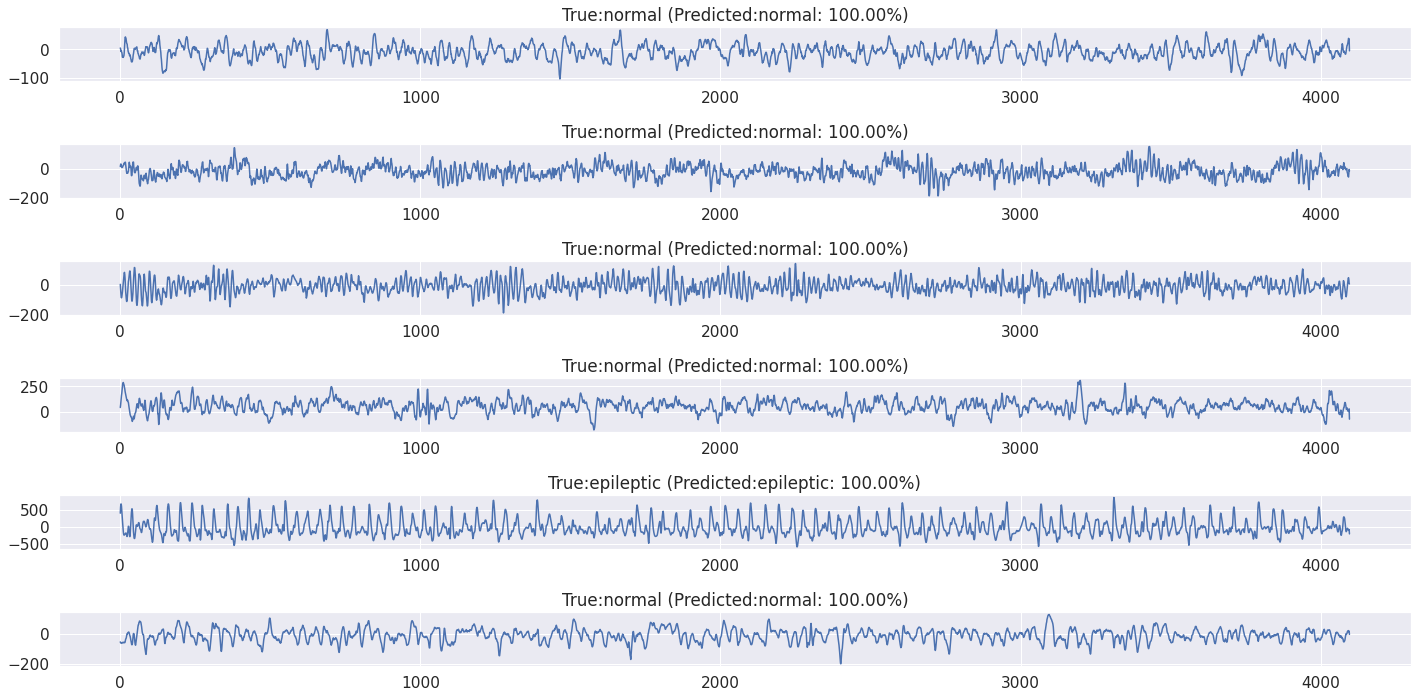

In [31]:
idx = random.sample(range(0,100), 6) # regenerate random index

for i in range(6):
    (normal, epileptic) = model.predict(X_test)[idx[i]]
    label = "normal" if normal > epileptic else "epileptic"
    proba = epileptic if epileptic > normal else normal
    label = "{}: {:.2f}%".format(label, proba * 100)
    true_label = 'normal' if (Y_test[idx[i]] == 1)[0] else 'epileptic'
   
    plt.subplot(611+i)
    plt.plot(X_test[idx[i]])
    plt.title('True:{} (Predicted:{})'.format(true_label,label))
    plt.axis('on')
    plt.tight_layout()

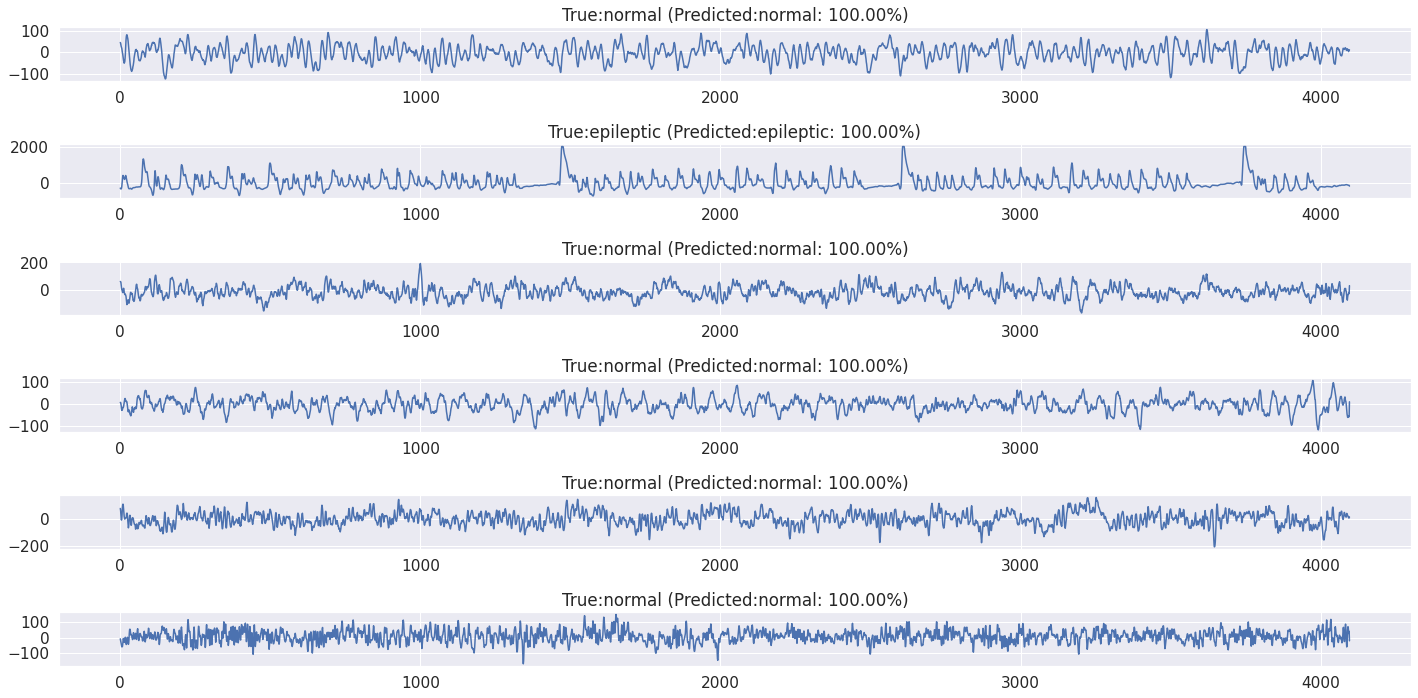

In [34]:
idx = random.sample(range(0,100), 10) # regenerate random index

for i in range(6):
    (normal, epileptic) = model.predict(X_test)[idx[i]]
    label = "normal" if normal > epileptic else "epileptic"
    proba = epileptic if epileptic > normal else normal
    label = "{}: {:.2f}%".format(label, proba * 100)
    true_label = 'normal' if (Y_test[idx[i]] == 1)[0] else 'epileptic'
   
    plt.subplot(611+i)
    plt.plot(X_test[idx[i]])
    plt.title('True:{} (Predicted:{})'.format(true_label,label))
    plt.axis('on')
    plt.tight_layout()

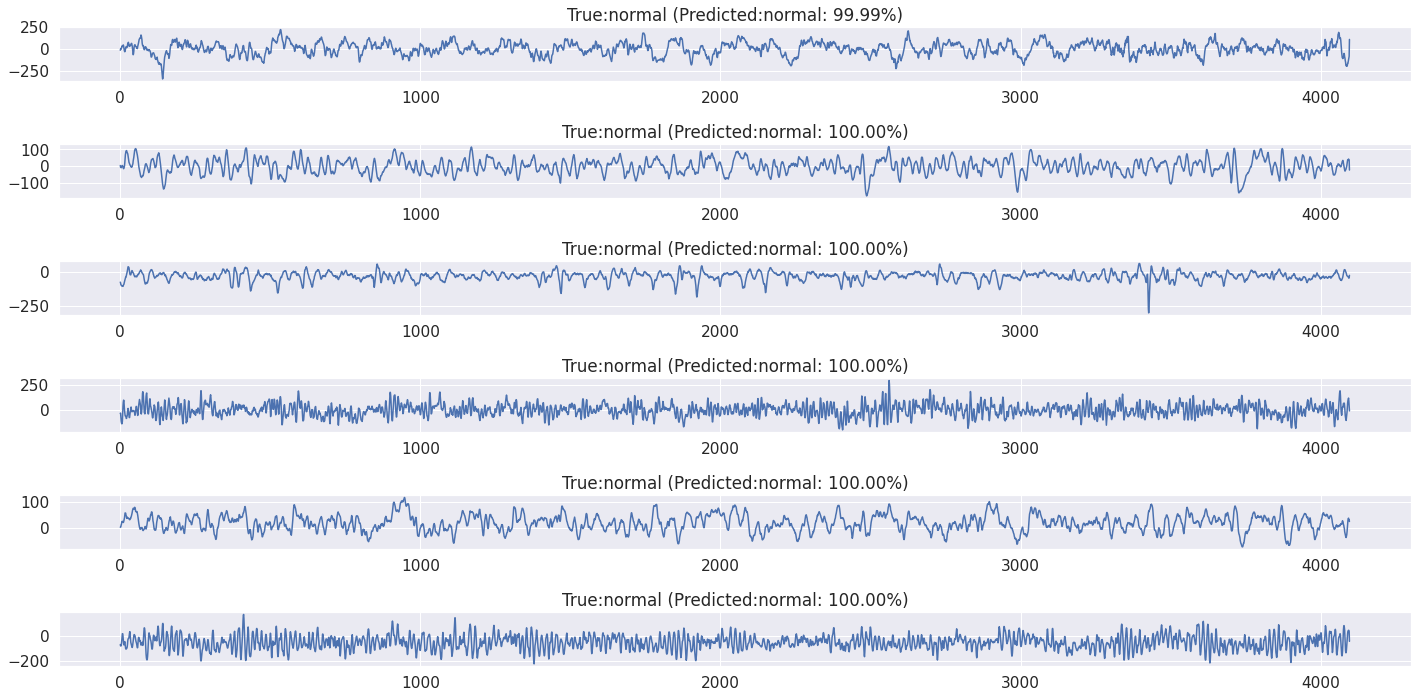

In [39]:
idx = random.sample(range(0,90), 8) # regenerate random index

for i in range(6):
    (normal, epileptic) = model.predict(X_test)[idx[i]]
    label = "normal" if normal > epileptic else "epileptic"
    proba = epileptic if epileptic > normal else normal
    label = "{}: {:.2f}%".format(label, proba * 100)
    true_label = 'normal' if (Y_test[idx[i]] == 1)[0] else 'epileptic'
   
    plt.subplot(611+i)
    plt.plot(X_test[idx[i]])
    plt.title('True:{} (Predicted:{})'.format(true_label,label))
    plt.axis('on')
    plt.tight_layout()

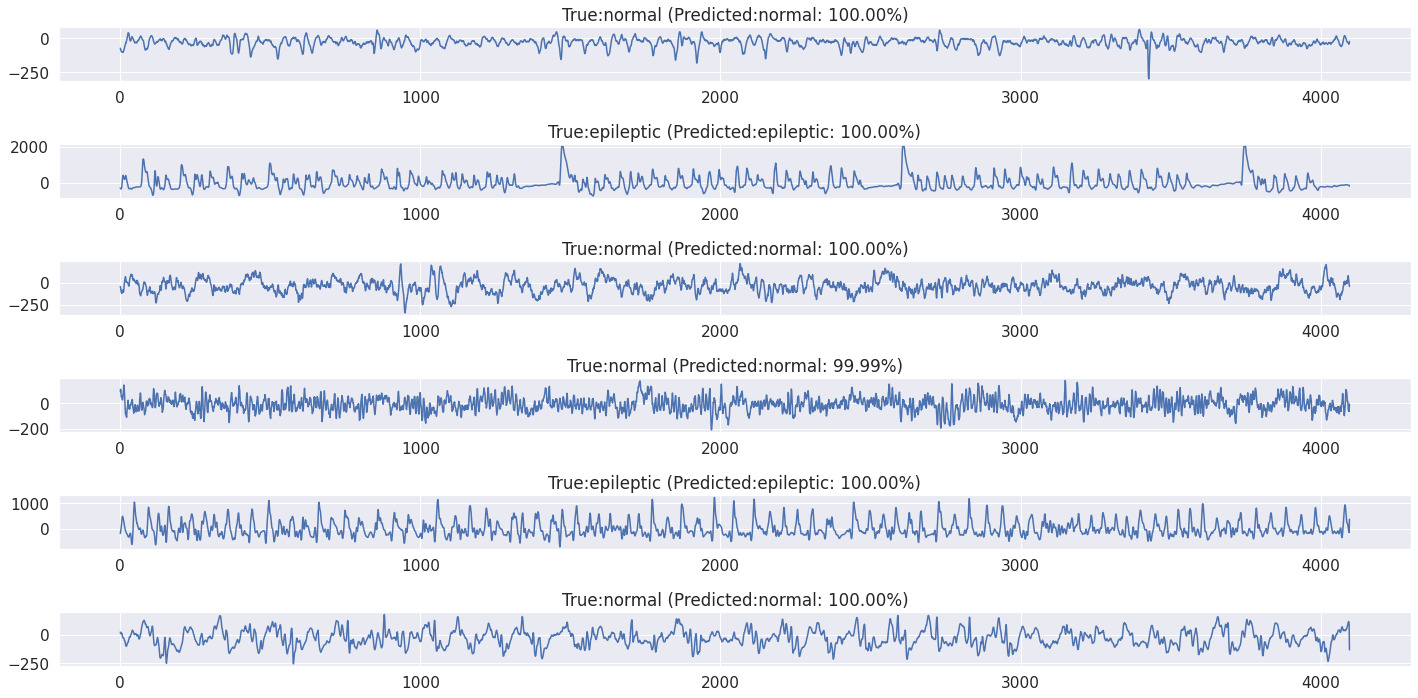

In [48]:
idx = random.sample(range(0,38), 8) # regenerate random index

for i in range(6):
    (normal, epileptic) = model.predict(X_test)[idx[i]]
    label = "normal" if normal > epileptic else "epileptic"
    proba = epileptic if epileptic > normal else normal
    label = "{}: {:.2f}%".format(label, proba * 100)
    true_label = 'normal' if (Y_test[idx[i]] == 1)[0] else 'epileptic'
   
    plt.subplot(611+i)
    plt.plot(X_test[idx[i]])
    plt.title('True:{} (Predicted:{})'.format(true_label,label))
    plt.axis('on')
    plt.tight_layout()

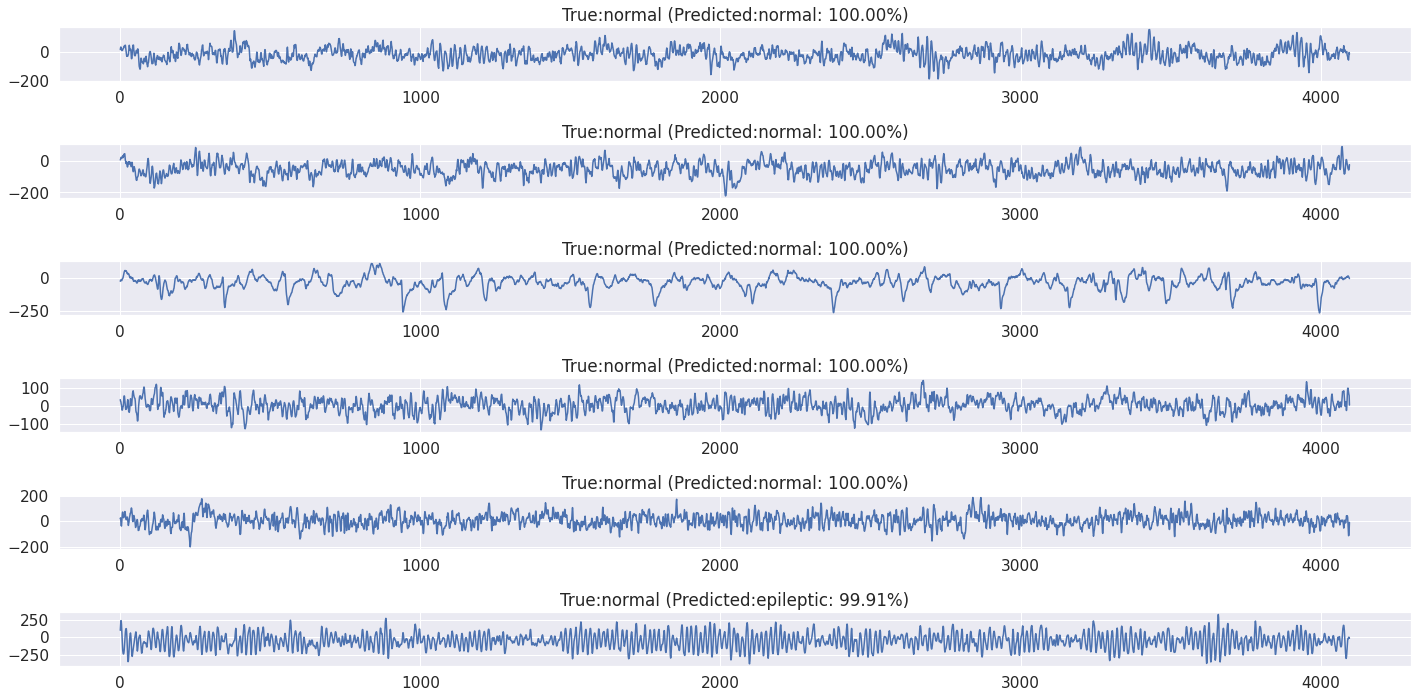

In [49]:
idx = random.sample(range(0,38), 8) # regenerate random index

for i in range(6):
    (normal, epileptic) = model.predict(X_test)[idx[i]]
    label = "normal" if normal > epileptic else "epileptic"
    proba = epileptic if epileptic > normal else normal
    label = "{}: {:.2f}%".format(label, proba * 100)
    true_label = 'normal' if (Y_test[idx[i]] == 1)[0] else 'epileptic'
   
    plt.subplot(611+i)
    plt.plot(X_test[idx[i]])
    plt.title('True:{} (Predicted:{})'.format(true_label,label))
    plt.axis('on')
    plt.tight_layout()

In [ ]:
KJ